In [2]:
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import time

In [8]:
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16_half.npy")
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16_half.npy")

In [64]:
spinal_cord = images[:, :, 0] *labels[:, :, 0]
left_lung = images[:, :, 0] *labels[:, :, 1]
right_lung = images[:, :, 0] *labels[:, :, 2]
heart = images[:, :, 0] *labels[:, :, 3]
esophagus = images[:, :, 0] *labels[:, :, 4]

In [65]:
left_lung.shape

(256, 256)

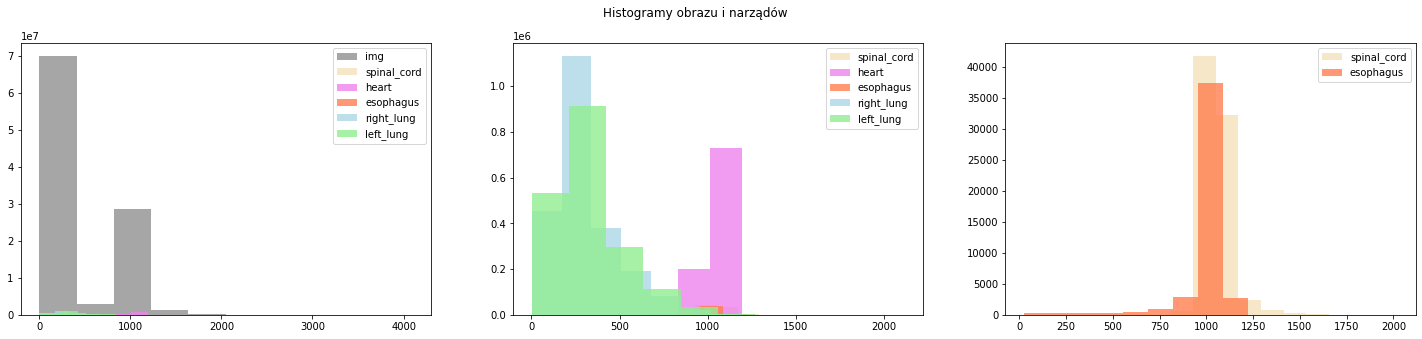

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(25,5))
fig.suptitle('Histogramy obrazu i narządów')

ax1.hist(images[images>-1], facecolor='gray', alpha=0.7, label='img')
ax1.hist(spinal_cord[spinal_cord>0], facecolor='wheat', alpha=0.7, label='spinal_cord')
ax1.hist(heart[heart>0], facecolor='violet', alpha=0.8, label='heart')
ax1.hist(esophagus[esophagus>0], facecolor='coral', alpha=0.8, label='esophagus')
ax1.hist(right_lung[right_lung>0], facecolor='lightblue', alpha=0.8, label='right_lung')
ax1.hist(left_lung[left_lung>0], facecolor='lightgreen', alpha=0.8, label='left_lung')
ax1.legend(loc='upper right')

ax2.hist(spinal_cord[spinal_cord>0], facecolor='wheat', alpha=0.7, label='spinal_cord')
ax2.hist(heart[heart>0], facecolor='violet', alpha=0.8, label='heart')
ax2.hist(esophagus[esophagus>0], facecolor='coral', alpha=0.8, label='esophagus')
ax2.hist(right_lung[right_lung>0], facecolor='lightblue', alpha=0.8, label='right_lung')
ax2.hist(left_lung[left_lung>0], facecolor='lightgreen', alpha=0.8, label='left_lung')
ax2.legend(loc='upper right')

ax3.hist(spinal_cord[spinal_cord>0], facecolor='wheat', alpha=0.7, label='spinal_cord')
ax3.hist(esophagus[esophagus>0], facecolor='coral', alpha=0.8, label='esophagus')
ax3.legend(loc='upper right')
#plt.show()

plt.show()

In [67]:
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16_half.npy")
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16_half.npy")

In [68]:
spinal_cord = images[:, :, :, 0] *labels[:, :, :, 0]
left_lung = images[:, :, :, 0] *labels[:, :, :, 1]
right_lung = images[:, :, :, 0] *labels[:, :, :, 2]
heart = images[:, :, :, 0] *labels[:, :, :, 3]
esophagus = images[:, :, :, 0] *labels[:, :, :, 4]

In [69]:
images.dtype

dtype('int16')

In [70]:
def get_statistics(array):
    print("Minimum of an array ", np.min(array))
    print("Maximum of an array ", np.max(array))
    print("Mean of an array ", np.mean(array))
    print("Standard Deviation of an array ", np.std(array))
    print("25% ", np.percentile(array, 25))
    print("50% ", np.percentile(array, 50))
    print("75% ", np.percentile(array, 75))
    

In [71]:
##IMAGES
get_statistics(images)

Minimum of an array  -2000
Maximum of an array  4095
Mean of an array  171.61713718189912
Standard Deviation of an array  755.1540055776329
25%  24.0
50%  36.0
75%  901.0


In [72]:
##SPINAL CORD
get_statistics(spinal_cord[spinal_cord>0])

Minimum of an array  808
Maximum of an array  2019
Mean of an array  1054.5307103936968
Standard Deviation of an array  65.49313468997403
25%  1026.0
50%  1048.0
75%  1068.0


In [73]:
##LEFT LUNG
get_statistics(left_lung[left_lung>0])

Minimum of an array  1
Maximum of an array  2116
Mean of an array  332.2572177368221
Standard Deviation of an array  180.48618361353948
25%  204.0
50%  284.0
75%  411.0


In [74]:
##RIGHT LUNG
get_statistics(right_lung[right_lung>0])

Minimum of an array  1
Maximum of an array  1699
Mean of an array  302.20657884091764
Standard Deviation of an array  174.4248513877459
25%  183.0
50%  250.0
75%  375.0


In [75]:
##HEART
get_statistics(heart[heart>0])

Minimum of an array  115
Maximum of an array  1911
Mean of an array  1036.1944430095307
Standard Deviation of an array  48.37611815808549
25%  1022.0
50%  1052.0
75%  1066.0


In [76]:
##ESPOHAGUS
get_statistics(esophagus[esophagus>0])

Minimum of an array  24
Maximum of an array  1355
Mean of an array  1008.159568152334
Standard Deviation of an array  135.4039631208374
25%  1012.0
50%  1043.0
75%  1062.0


In [9]:
labels.shape

(1700, 256, 256, 5)

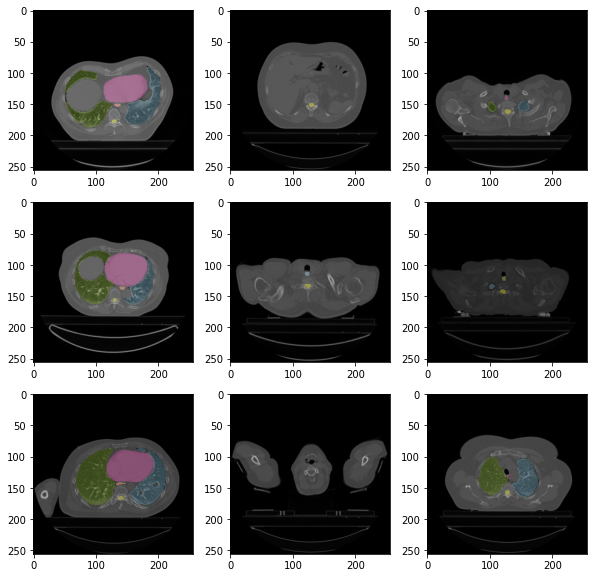

In [17]:
from skimage.color import label2rgb

imgs = np.zeros((6, images.shape[1], images.shape[2], 3), dtype = np.uint8)
j=1
fig = plt.figure(figsize=(10, 10))
for d in [40, 150, 100, 600, 532, 920, 333, 253, 213]:
    l = labels[d, :, :, 0] + labels[d, :, :, 1]*2 + labels[d, :, :, 2]*3 + labels[d, :, :, 3]*4 + labels[d, :, :, 4]*5 
    i = ((images[d] - images[d].min()) * (1/(images[d].max() - images[d].min()) * 255)).astype('uint8')
    new_arr = ((images[d, :, :] - images[d, :, :].min()) * (1/(images[d, :, :].max() - images[d, :, :].min()) * 255)).astype('uint8')

    tmp_img2 = np.zeros((images.shape[1], images.shape[2], 3), dtype = np.uint8)
    tmp_img2[:, :, 1] = (i[:, :, 0]).astype(np.uint8)
    tmp_img2[:, :, 2] = (i[:, :, 0]).astype(np.uint8)
    tmp_img2[:, :, 0] = (i[:, :, 0]).astype(np.uint8)
    img = label2rgb(l, image=tmp_img2, bg_label=0, colors=['yellow', 'skyblue', 'yellowgreen', 'mediumvioletred', 'coral'])

    fig.add_subplot(3, 3, j)
    j+=1
    plt.imshow(img)
plt.show()

plt.show()

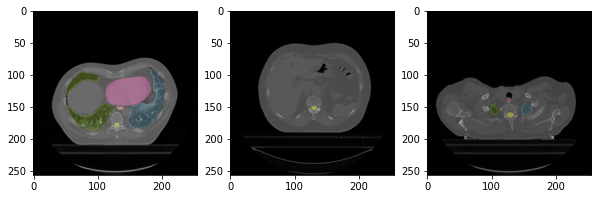

In [87]:
from skimage.color import label2rgb
l = labels[40, :, :, 0] + labels[40, :, :, 1]*2 + labels[40, :, :, 2]*3 + labels[40, :, :, 3]*4 + labels[40, :, :, 4]*5 
i = ((images[40] - images[40].min()) * (1/(images[40].max() - images[40].min()) * 255)).astype('uint8')
new_arr = ((images[40, :, :] - images[40, :, :].min()) * (1/(images[40, :, :].max() - images[40, :, :].min()) * 255)).astype('uint8')

tmp_img = np.zeros((l.shape[0], l.shape[1], 3), dtype = np.uint8)
tmp_img[:, :, 1] = (i[:, :, 0]).astype(np.uint8)
tmp_img[:, :, 2] = (i[:, :, 0]).astype(np.uint8)
tmp_img[:, :, 0] = (i[:, :, 0]).astype(np.uint8)
imgs = np.zeros((6, l.shape[0], l.shape[1], 3), dtype = np.uint8)

for d in [40, 150, 100, 600, 532, 920]:
    l = labels[d, :, :, 0] + labels[d, :, :, 1]*2 + labels[d, :, :, 2]*3 + labels[d, :, :, 3]*4 + labels[d, :, :, 4]*5 
    i = ((images[d] - images[d].min()) * (1/(images[d].max() - images[d].min()) * 255)).astype('uint8')
    new_arr = ((images[d, :, :] - images[d, :, :].min()) * (1/(images[d, :, :].max() - images[d, :, :].min()) * 255)).astype('uint8')

    tmp_img2 = np.zeros((l.shape[0], l.shape[1], 3), dtype = np.uint8)
    tmp_img2[:, :, 1] = (i2[:, :, 0]).astype(np.uint8)
    tmp_img2[:, :, 2] = (i2[:, :, 0]).astype(np.uint8)
    tmp_img2[:, :, 0] = (i2[:, :, 0]).astype(np.uint8)
    image_label_overlay = label2rgb(l, image=tmp_img2, bg_label=0, colors=['yellow', 'skyblue', 'yellowgreen', 'mediumvioletred', 'coral'])



l3 = labels[100, :, :, 0] + labels[100, :, :, 1]*2 + labels[100, :, :, 2]*3 + labels[100, :, :, 3]*4 + labels[100, :, :, 4]*5 
i3 = ((images[100] - images[100].min()) * (1/(images[100].max() - images[100].min()) * 255)).astype('uint8')
new_arr3 = ((images[100, :, :] - images[100, :, :].min()) * (1/(images[100, :, :].max() - images[100, :, :].min()) * 255)).astype('uint8')

tmp_img3 = np.zeros((l.shape[0], l.shape[1], 3), dtype = np.uint8)
tmp_img3[:, :, 1] = (i3[:, :, 0]).astype(np.uint8)
tmp_img3[:, :, 2] = (i3[:, :, 0]).astype(np.uint8)
tmp_img3[:, :, 0] = (i3[:, :, 0]).astype(np.uint8)


l4 = labels[100, :, :, 0] + labels[100, :, :, 1]*2 + labels[100, :, :, 2]*3 + labels[100, :, :, 3]*4 + labels[100, :, :, 4]*5 
i4 = ((images[100] - images[100].min()) * (1/(images[100].max() - images[100].min()) * 255)).astype('uint8')
new_arr4 = ((images[100, :, :] - images[100, :, :].min()) * (1/(images[100, :, :].max() - images[100, :, :].min()) * 255)).astype('uint8')

tmp_img4 = np.zeros((l.shape[0], l.shape[1], 3), dtype = np.uint8)
tmp_img4[:, :, 1] = (i3[:, :, 0]).astype(np.uint8)
tmp_img4[:, :, 2] = (i3[:, :, 0]).astype(np.uint8)
tmp_img44[:, :, 0] = (i3[:, :, 0]).astype(np.uint8)

image_label_overlay = label2rgb(l, image=tmp_img, bg_label=0, colors=['yellow', 'skyblue', 'yellowgreen', 'mediumvioletred', 'coral'])
image_label_overlay2 = label2rgb(l2, image=tmp_img2, bg_label=0, colors=['yellow', 'skyblue', 'yellowgreen', 'mediumvioletred', 'coral'])
image_label_overlay3 = label2rgb(l3, image=tmp_img3, bg_label=0, colors=['yellow', 'skyblue', 'yellowgreen', 'mediumvioletred', 'coral'])

#plt.figure(figsize = (10,10))

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(2, 3,figsize=(10,5))
ax1.imshow(image_label_overlay)
ax2.imshow(image_label_overlay2)
ax3.imshow(image_label_overlay3)
ax4.imshow(image_label_overlay4)
ax5.imshow(image_label_overlay5)
ax6.imshow(image_label_overlay6)

plt.show()

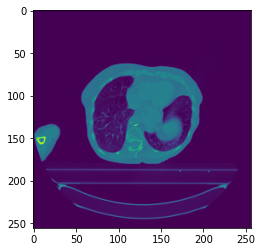

In [84]:
plt.imshow(images[1000])